# Global Suicide Rate Analysis

In this notebook, dataset of suicide rate from 1985-2015 globally is investigated. The dataset is used to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

In the dataset, features like **country, year,sex, age, suicides number, population of the country** are listed. I inverstigated the suicide rate over time, compared suicide rate between age and sex, and chose United Stated and China as comparision to see the relationship between suicide rate and GDP. 

In the end, the conclusions from the investigation is drawn. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


## 1. Load and pre-process the dataset

In [2]:
df = pd.read_csv('master.csv')
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9521,Georgia,1997,male,35-54 years,38,557750,6.81,Georgia1997,NaN,"3,510,540,809",828,Boomers
6913,Cuba,2015,female,35-54 years,102,1870168,5.45,Cuba2015,NaN,"87,132,800,000",8044,Generation X
6506,Croatia,2006,male,15-24 years,49,293976,16.67,Croatia2006,NaN,"50,453,577,898",11914,Millenials
6210,Costa Rica,2001,female,5-14 years,1,398691,0.25,Costa Rica2001,NaN,"15,913,363,335",4412,Millenials
11,Albania,1987,male,5-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
# suicide['year'].value_counts()
# drop year 2016 due to insufficient data
# drop column "HID for year" due to insufficient data
# drop column "country-year" due to duplicate information
# drop column "generation" due to unused information
df = df[df.year!=2016]
df.drop(['HDI for year', 'country-year', 'generation'], axis=1, inplace=True)
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
945,Argentina,2014,female,75+ years,25,1323654,1.89,"526,319,673,732",13400
12401,Ireland,2013,female,75+ years,3,140976,2.13,"239,389,340,720",56628
22591,Singapore,2000,female,5-14 years,1,238100,0.42,"95,833,932,715",31446
13199,Jamaica,1988,female,25-34 years,1,183521,0.54,"3,828,310,735",1831
27259,Uruguay,1988,male,25-34 years,33,208700,15.81,"8,213,515,459",2934


In [4]:
# convert gdp data to numeric
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '].str.replace(',',''))


In [5]:
df.rename(columns={' gdp_for_year ($) ':'gdp', 'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)


## 2. Process and investigate the dataset

### 2.1 Suicide rate trend globally over year

In [27]:
# group dataset by year and calculate summation 
df_yearly = df.groupby(['year']).sum()
#df_yearly

In [28]:
# calculate average gdp of each year based on all countries
gdp_year = []
country_num = []
for i in range(1985, 2016):
    gdp_year.append(df[df['year'] == i]['gdp'].unique().mean())
    country_num.append(len(df[df['year'] == 2015]['country'].unique()))
#gdp_year

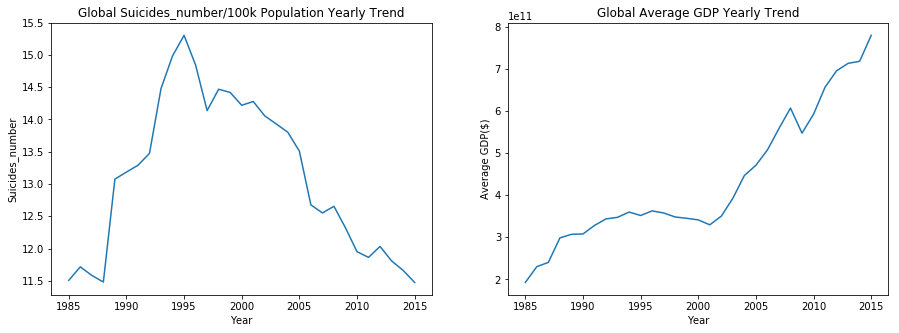

In [10]:
figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

axs[0].plot(df_yearly.index.values, df_yearly['suicides_no']/df_yearly['population']*1e5)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Suicides_number')
axs[0].set_title('Global Suicides_number/100k Population Yearly Trend')

axs[1].plot(df_yearly.index.values, gdp_year)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average GDP($)')
axs[1].set_title('Global Average GDP Yearly Trend')

plt.show()

#plt.plot(df.groupby(['year']).mean()['suicides/100k pop'])

we can see that the suicide rate peaks at 1995, and gradually decreasing in the following years, until 2015, the suicide rate is only close to year 1986. While the average gdp is increasing gadually in the plotted time span, and we see no particular change in the year 1995. 

### 2.2 Suicide rate comparison over gender 

In [11]:
df_gender = df.groupby(['sex']).sum()
df_gender

,year,suicides_no,population,suicides/100k pop,gdp,gdp_per_capita
sex,,,,,,
female,27676224,1556006,26205413358,74629.28,6183405229092252,232559310
male,27676224,5176811,24984643182,279767.16,6183405229092252,232559310


In [12]:
# calculate the suicide rate of male and female over time respectively 
year =  range(1985, 2016)
male_year = []
female_year = []
for i in year:
    male_year.append(df[(df.year==i)&(df.sex=='male')]['suicides/100k pop'].mean())
    female_year.append(df[(df.year==i)&(df.sex=='female')]['suicides/100k pop'].mean())
print(male_year)

[17.875486111111112, 17.033993055555555, 17.556296296296296, 19.095408163265304, 19.581314102564104, 19.818906250000001, 20.849791666666668, 20.74746153846154, 21.636153846153846, 21.906519607843133, 24.905256410256413, 24.296471861471865, 23.903982683982683, 23.774198312236287, 23.196305220883531, 22.0996511627907, 21.546344696969697, 21.966996124031009, 21.107655038759692, 19.909761904761904, 19.129285714285714, 19.085862745098041, 19.056666666666661, 18.835960784313727, 18.273333333333333, 18.025681818181816, 17.686375968992248, 18.321810699588479, 17.849708333333336, 17.564123931623929, 17.534677419354839]


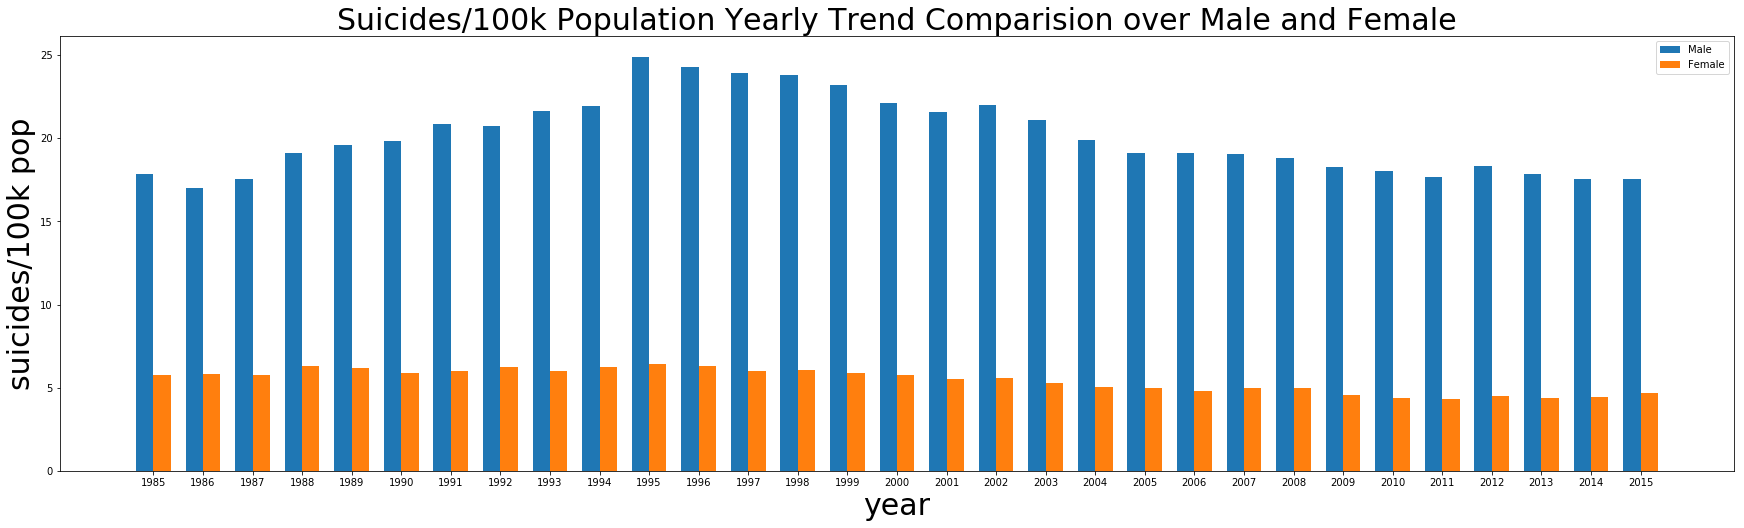

In [13]:
figure, axs = plt.subplots(figsize = (30,8))

ind = np.arange(len(male_year))  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = axs.bar(ind - width/2, male_year, width, label='Male')
rects2 = axs.bar(ind + width/2, female_year, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_xlabel('year', size=30)
axs.set_xticks(ind)
axs.set_xticklabels((year))
axs.set_ylabel('suicides/100k pop', size=30)
axs.legend()
axs.set_title('Suicides/100k Population Yearly Trend Comparision over Male and Female', size = 30)
plt.show()

From the above plot, we can see male suicides number is three times more than female  every year. Maybe man are under more pressure to support the family?

### 2.3 Suicide rate comparison over age 

In [14]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [29]:
age5_14_year = []
age15_24_year = []
age25_34_year = []
age35_54_year = []
age55_74_year = []
age75_year = []
for i in year:
    age5_14_year.append(df[(df.year==i)&(df.age=='5-14 years')]['suicides/100k pop'].mean())
    age15_24_year.append(df[(df.year==i)&(df.age=='15-24 years')]['suicides/100k pop'].mean())
    age25_34_year.append(df[(df.year==i)&(df.age=='25-34 years')]['suicides/100k pop'].mean())
    age35_54_year.append(df[(df.year==i)&(df.age=='35-54 years')]['suicides/100k pop'].mean())
    age55_74_year.append(df[(df.year==i)&(df.age=='55-74 years')]['suicides/100k pop'].mean())
    age75_year.append(df[(df.year==i)&(df.age=='75+ years')]['suicides/100k pop'].mean())


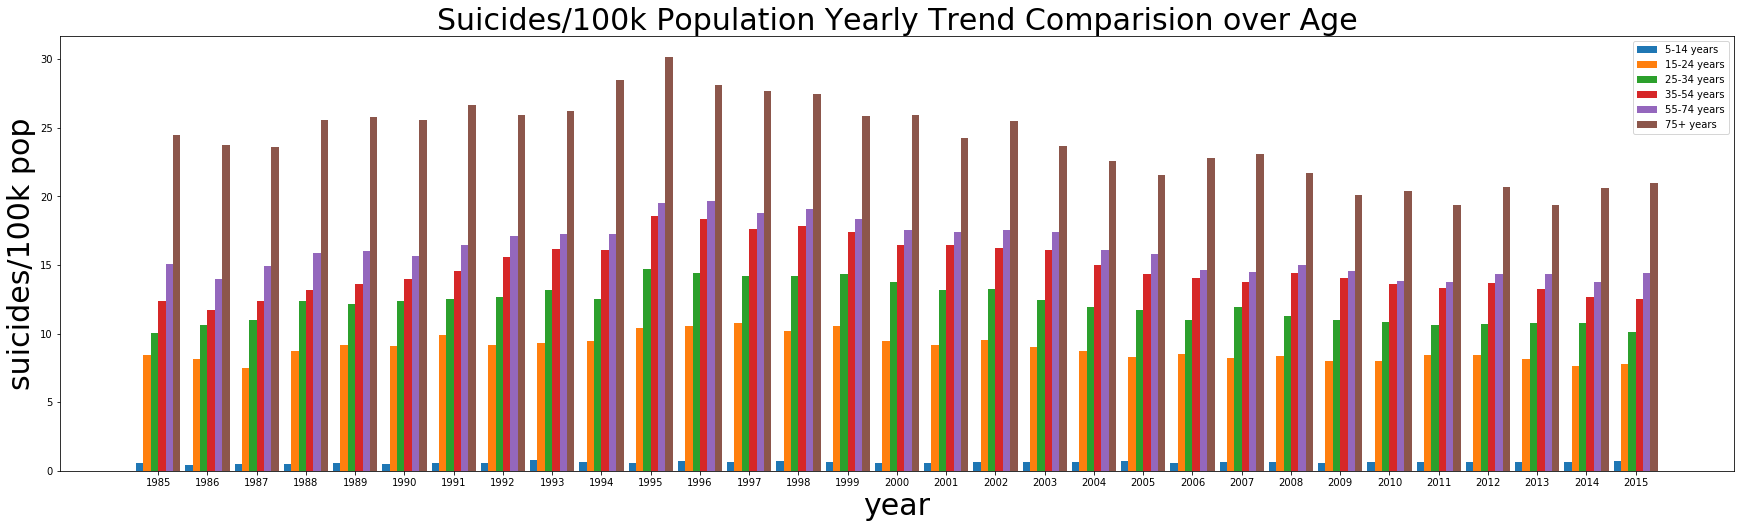

In [16]:
figure, axs = plt.subplots(figsize = (30,8))

ind = np.arange(len(age35_54_year))  # the x locations for the groups
width = 0.15  # the width of the bars
rects1 = axs.bar(ind - width*2.5, age5_14_year, width, label='5-14 years')
rects2 = axs.bar(ind - width*1.5, age15_24_year, width, label='15-24 years')
rects3 = axs.bar(ind - width*0.5, age25_34_year, width, label='25-34 years')
rects4 = axs.bar(ind + width*0.5, age35_54_year, width, label='35-54 years')
rects5 = axs.bar(ind + width*1.5, age55_74_year, width, label='55-74 years')
rects6 = axs.bar(ind + width*2.5, age75_year, width, label='75+ years')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_xlabel('year', size=30)
axs.set_xticks(ind)
axs.set_xticklabels((year))
axs.set_ylabel('suicides/100k pop', size=30)
axs.legend()
axs.set_title('Suicides/100k Population Yearly Trend Comparision over Age', size = 30)
plt.show()

Obviously, older people are more likely to commit suicide. The more we know, the more stressful we are, sigh. 

### 2.4 Suicide rate by country 

In [17]:
suicide_by_country = df.groupby(['country']).mean()
top10 = list(suicide_by_country['suicides/100k pop'].sort_values(ascending=False).head(10).index)
print('Top 10 highest suicide rate countries are:', top10)
bot10 = list(suicide_by_country['suicides/100k pop'].sort_values(ascending=True).head(10).index)
print('Top 10 highest suicide rate countries are:', bot10)

Top 10 highest suicide rate countries are: ['Lithuania', 'Sri Lanka', 'Russian Federation', 'Hungary', 'Belarus', 'Kazakhstan', 'Latvia', 'Slovenia', 'Estonia', 'Ukraine']
Top 10 highest suicide rate countries are: ['Saint Kitts and Nevis', 'Dominica', 'Jamaica', 'Antigua and Barbuda', 'Oman', 'South Africa', 'Kuwait', 'Bahamas', 'United Arab Emirates', 'Maldives']


In [18]:
suicide_by_country.sample(5)

,year,suicides_no,population,suicides/100k pop,gdp,gdp_per_capita
country,,,,,,
Cyprus,2008.071429,2.238095,64857.845238,3.208988,2.145267e+10,27821.214286
Dominica,1985.000000,0.000000,5533.333333,0.000000,9.858518e+07,1485.000000
Costa Rica,1999.500000,18.866667,283824.411111,7.093667,1.918353e+10,5149.700000
Switzerland,2005.000000,104.035714,595214.325397,19.024087,4.565306e+11,62981.761905
Ireland,1999.500000,34.927778,302843.572222,10.782583,1.315586e+11,34230.866667


In [19]:
top_countries = pd.concat([suicide_by_country.loc[top10], suicide_by_country.loc[bot10]], axis=0)
top_countries

,year,suicides_no,population,suicides/100k pop,gdp,gdp_per_capita
country,,,,,,
Lithuania,2005.000000,108.003968,2.604758e+05,40.583968,2.711290e+10,9024.142857
Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,1.532645e+10,904.272727
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,8.843229e+11,6518.814815
Hungary,2003.000000,240.433333,8.008463e+05,33.049100,8.831404e+10,9234.120000
Belarus,2001.095238,237.666667,7.832234e+05,31.075913,3.067641e+10,3333.904762
Kazakhstan,2002.500000,325.467949,1.209980e+06,30.511282,7.868722e+10,5329.115385
Latvia,2005.000000,50.674603,1.779867e+05,29.259325,1.831660e+10,8961.095238
Slovenia,2005.000000,42.123016,1.597961e+05,27.827857,3.590006e+10,18642.238095
Estonia,2005.000000,27.912698,1.075032e+05,27.276905,1.444586e+10,11376.095238


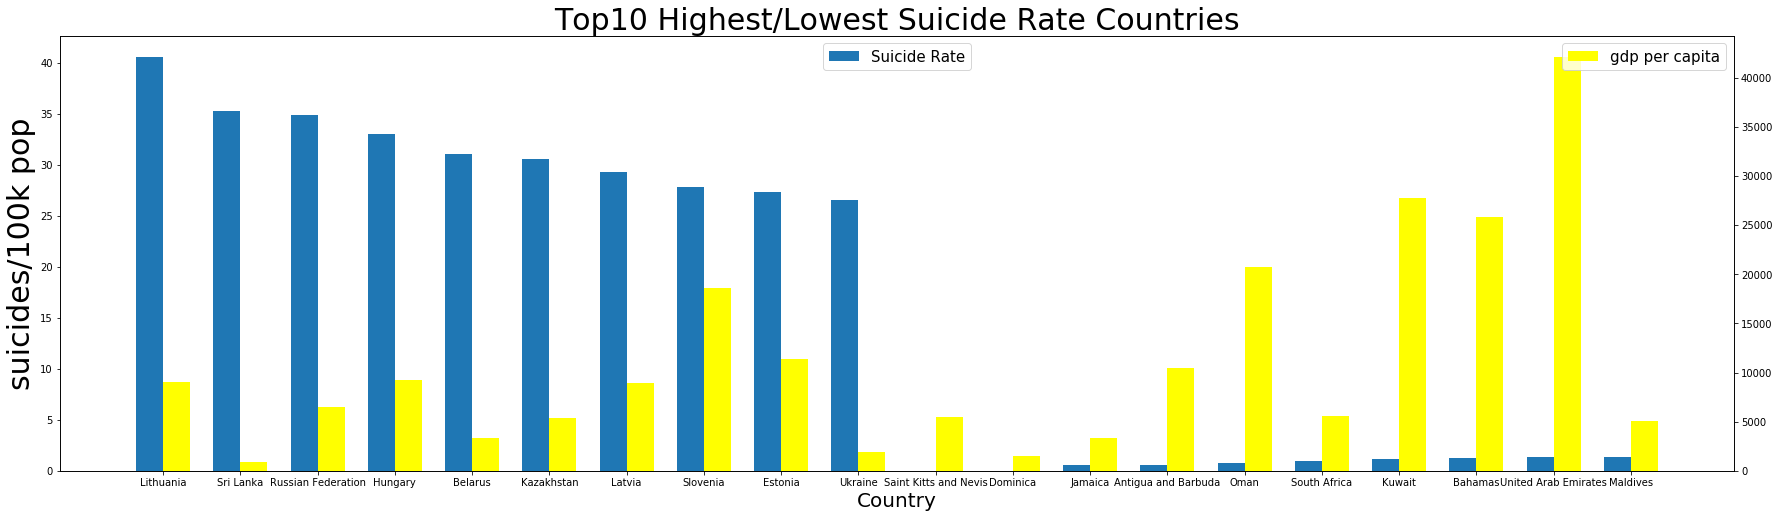

In [21]:
figure, axs = plt.subplots( figsize = (30,8))

# Top10 highest 
ind = np.arange(20)  # the x locations for the groups
width = 0.35  # the width of the bars
rects1 = axs.bar(ind - width/2, list(top_countries['suicides/100k pop']), width, label='Suicide Rate')
ax2 = axs.twinx()
rects2 = ax2.bar(ind + width/2, list(top_countries['gdp_per_capita']), width, label='gdp per capita', color='yellow')
# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_xlabel('Country', size=20)
axs.set_xticks(ind)
axs.set_xticklabels((top_countries.index), size=10)
axs.set_ylabel('suicides/100k pop', size=30)
axs.legend(loc='upper center', fontsize=15)
#ax2.set_ylabel('gpd per capita', size=30)
ax2.legend(loc='upper right',  fontsize=15)
axs.set_title('Top10 Highest/Lowest Suicide Rate Countries', size = 30)
plt.show()

From the above plot, we see no direct relation between suicide rate and gdp. The top 10 highest suicide rate countries are mostly from Soviet bloc nation  While the top 10 lowest suicide rate countries are mostly island counties, with beautiful beaches and pleasant weather, who would like to die. 

### 2.5 Compare suicide rate between developed and developping countries

In [22]:
df_usa = df[df['country']=='United States'].groupby(['year']).sum()
usa_rate = list(df_usa['suicides_no']/df_usa['population']*1e5)

In [23]:
df_mexico = df[df['country']=='Mexico'].groupby(['year']).sum()
mexico_rate = list(df_mexico['suicides_no']/df_mexico['population']*1e5)

In [24]:
usa_gpd = df[df['country']=='United States']['gdp_per_capita'].unique()
mexico_gpd = df[df['country']=='Mexico']['gdp_per_capita'].unique()

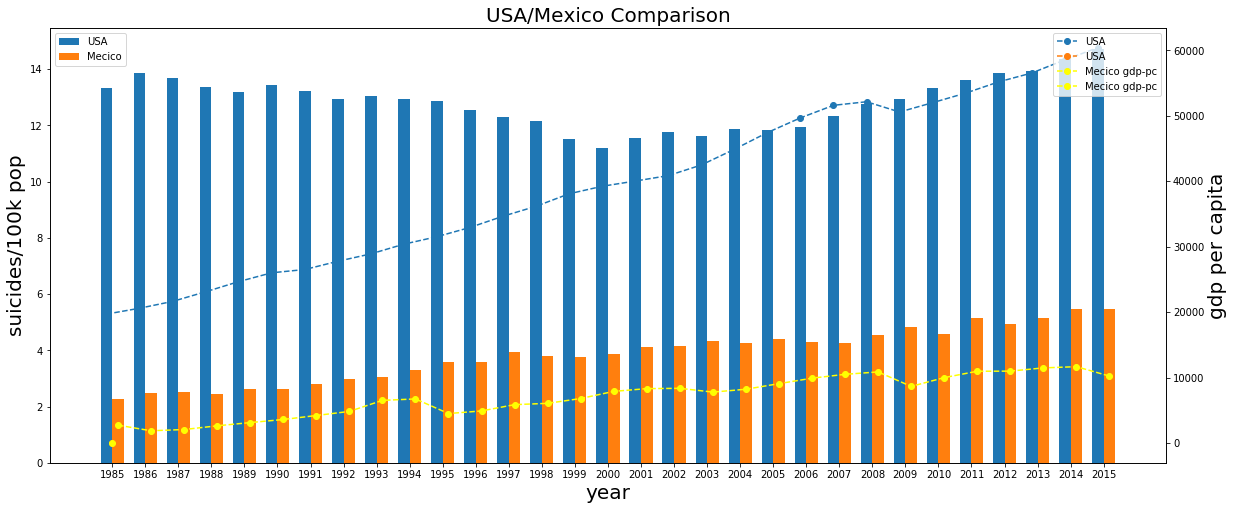

In [26]:
figure, axs = plt.subplots(figsize = (20,8))

ind = np.arange(len(year))  # the x locations for the groups
width = 0.35  # the width of the bars
axs.bar(ind - width/2, usa_rate, width, label='USA')
axs.bar(ind + width/2, mexico_rate, width, label='Mecico')
axs.set_xlabel('year', size=20)
axs.set_xticks(ind)
axs.set_xticklabels((year))
axs.set_ylabel('suicides/100k pop', size=20)
axs.legend(loc='upper left')
axs.set_title('USA/Mexico Comparison', size = 20)

axs2 = axs.twinx()
axs2.plot(ind - width/2, usa_gpd, width, label='USA', marker='o', linestyle='dashed')
axs2.plot(ind + width/2, mexico_gpd, width, label='Mecico gdp-pc', color='yellow', marker='o', linestyle='dashed')
axs2.legend(loc='upper right')
axs2.set_ylabel('gdp per capita', size=20)

plt.show()

Compare USA and its southern neighbor Mexico, although Mexico is less developed than USA, the suicide rate is much less. 

# 3. Conclusion

Suicide rate is investigated based on selected countries during 1985 to 2015, several interesting findings are derived:
1. Although gpd is growing year over year, and people are getting richer, the suicide rate doesn't decrease dramatically, it peaks at year 1995, then gradually decreases, the year 1988 shows lowest suicide rate. 
2. Male has three times higher suicide rate than female.
3. Older people higher larger suicide rate, especially over 75 years old. 
4. Countries in Soviet bloc nation show high suicide rate, while island countries have low suicide rate.
5. Although USA is much richer than its southern neighbor Mexico, the suicide rate is over three times higher. 